## Observations and Insights 

In [116]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')

# Display the data table for preview
mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [117]:
# Checking the number of mice.
print(len(pd.unique(mouse_study_df['Mouse ID'])))

249


In [118]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupl_mice = pd.DataFrame(mouse_study_df, columns=['Mouse ID', 'Timepoint'])
dupl_mice_count = dupl_mice[dupl_mice.duplicated(keep='first')]
print(dupl_mice_count)

    Mouse ID  Timepoint
909     g989          0
911     g989          5
913     g989         10
915     g989         15
917     g989         20


In [119]:
# Optional: Get all the data for the duplicate mouse ID. 
dupl_mice = pd.DataFrame(mouse_study_df, columns=['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'])
dupl_mice_count = dupl_mice[dupl_mice.duplicated(keep='first')]
print(dupl_mice_count)


    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   

     Tumor Volume (mm3)  Metastatic Sites  
909                45.0                 0  


In [120]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [121]:
# Checking the number of mice in the clean DataFrame.
print(len(pd.unique(mouse_study_df['Mouse ID'])))

249


## Summary Statistics

In [122]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
stats = pd.DataFrame(mouse_study_df.groupby('Drug Regimen').count())

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
stats['Mean'] = pd.DataFrame(mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean())
stats['Median'] = pd.DataFrame(mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median())
stats['Variance'] = pd.DataFrame(mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var())
stats['Standard Deviation'] = pd.DataFrame(mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std())
stats['SEM'] = pd.DataFrame(mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem())

# Assemble the resulting series into a single summary dataframe.
stats = stats[['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']]

print('TUMOR VOLUME SUMMARY STATISTICS BY DRUG REGIMEN')
stats.head()

TUMOR VOLUME SUMMARY STATISTICS BY DRUG REGIMEN


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [123]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].aggregate(['mean', 'median', 'var', 'std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

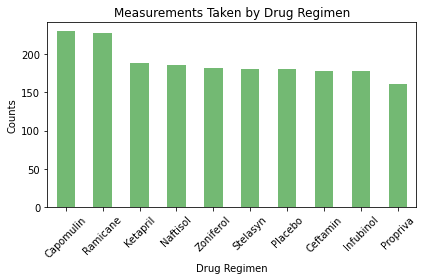

In [124]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# TODO --> figure out sorting of drug regimen by value count

# Get the counts of measurements taken by each drug regimen
measures = mouse_study_df['Drug Regimen'].value_counts()

# Plot the bar chart
measures.plot(kind='bar', alpha=.55, facecolor='green', rot='45')

# Add the title and axis labels
plt.title('Measurements Taken by Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Counts')

# Show the bar chart
plt.tight_layout()
plt.show()

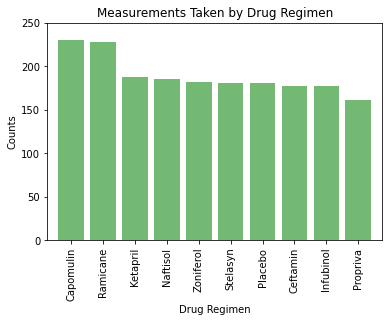

<Figure size 432x288 with 0 Axes>

In [125]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

# Define the x-axis and tick locations (using 'measures' variable set in prior task)
x_axis = np.arange(len(measures))
tick_locations = [value for value in x_axis]

# Plot the bar chart and x-axis tick locations
plt.bar(x_axis, measures, color='g', alpha=.55, align='center')
plt.xticks(tick_locations, measures.index.values, rotation=90)

# Set the limits on x-axis and y-axis
plt.xlim(-.75, len(x_axis)-.25)
plt.ylim(0, max(measures)+20)

# Add chart title and axis labels
plt.title('Measurements Taken by Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Counts')

# Show the chart
plt.show()
plt.tight_layout()

In [126]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [127]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [128]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [129]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [130]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [131]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [132]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [133]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
